In [40]:
import numpy as np
import matplotlib.pyplot as plt

import rasterio
from rasterio.plot import show

In [2]:
filepath = r'C:\Users\thindle2016\OneDrive - Liberty University\geog650\data\WA_Orchard_UAV_Multispectral_201910.tif'

In [3]:
with rasterio.open(filepath) as raster:
    img = raster.read()
    metadata = raster.meta

In [4]:
metadata

{'driver': 'GTiff',
 'dtype': 'uint32',
 'nodata': 65536.0,
 'width': 6477,
 'height': 5885,
 'count': 4,
 'crs': CRS.from_epsg(2286),
 'transform': Affine(0.17409386386154763, 0.0, 1834263.6934459868,
        0.0, -0.17409386386155817, 351653.015270708)}

In [5]:
print(metadata['crs']) # NAD_1983_StatePlane_Washington_South_FIPS_4602_Feet


EPSG:2286


In [6]:
print('bands, rows, cols')
img.shape

bands, rows, cols


(4, 5885, 6477)

In [7]:
print('Cell size x,y (US Feet)')
print(metadata['transform'].a, metadata['transform'].e)

Cell size x,y (US Feet)
0.17409386386154763 -0.17409386386155817


In [8]:
# Scale pixel values to range [0, 1]
img_scaled = rasterio.plot.adjust_band(img)

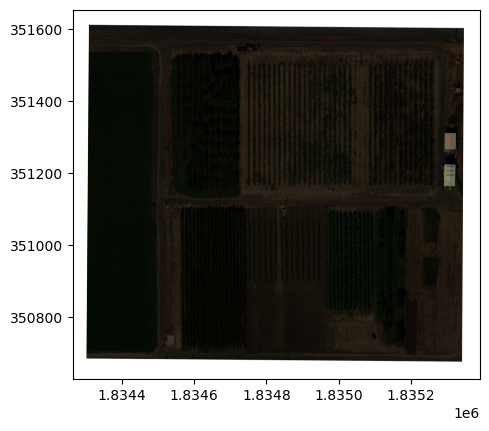

<AxesSubplot: >

In [9]:
natural_color = img_scaled[[2,1,0], :, :] # Red Green Blue composite
rasterio.plot.show(natural_color, transform=metadata['transform'])

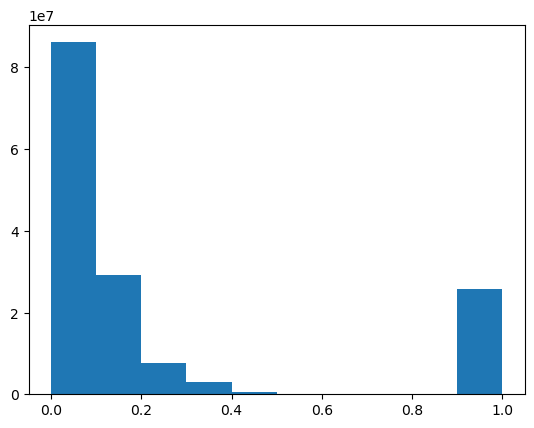

In [10]:
# Visualize image contrast
plt.hist(img_scaled.flatten())
plt.show()

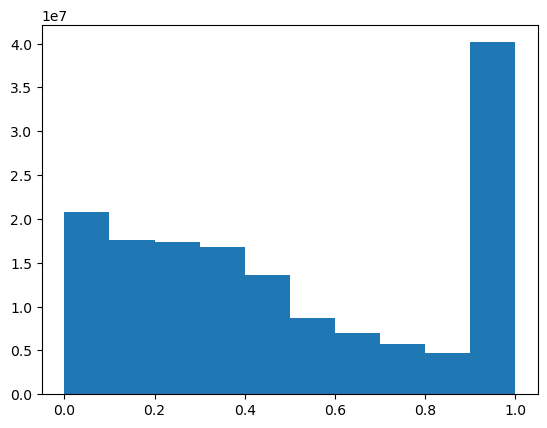

In [11]:
# Enhance visual contrast
adjustment_factor = 5
img_adjusted = img_scaled * adjustment_factor
img_adjusted = np.clip(img_adjusted, 0, 1)

plt.hist(img_adjusted.flatten())
plt.show()

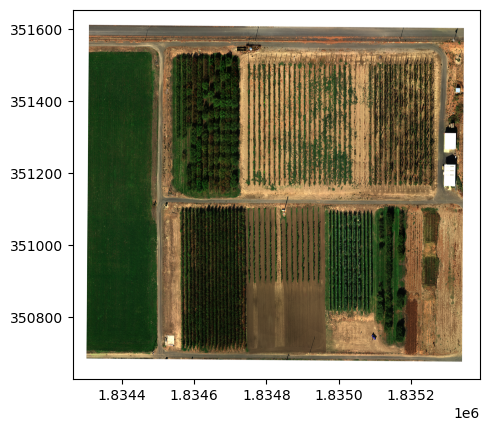

<AxesSubplot: >

In [12]:
natural_color_enhanced = img_adjusted[[2,1,0], :, :] # Red Green Blue composite
rasterio.plot.show(natural_color_enhanced, transform=metadata['transform'])

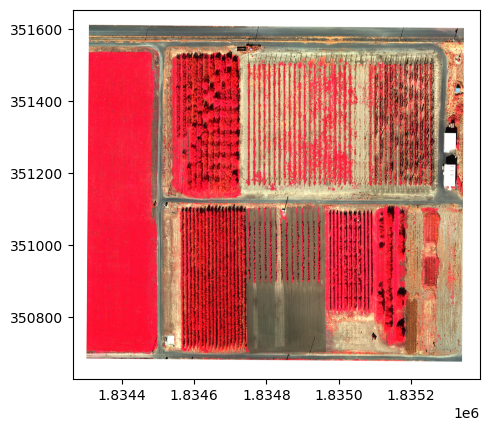

<AxesSubplot: >

In [13]:
color_infrared_enhanced = img_adjusted[[3,2,1], :, :] # NIR Red Green composite
rasterio.plot.show(color_infrared_enhanced, transform=metadata['transform'])

be sure to use original, non-adjusted raster

`img[3,:,:]` means band 3 all rows all cols

In [14]:
def calculate_vegetation_index(nir_band, red_band):
    '''Calculates the Normalized Difference Vegetation Index (NDVI) and
    outputs values from -1.0 to 1.0 used to quantify vegetation greenness
    for understanding its density and health'''

    ndvi = (nir - red) / (nir + red)
    return ndvi

C:\Users\thindle2016\AppData\Local\Temp\ipykernel_60688\414769188.py:6: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


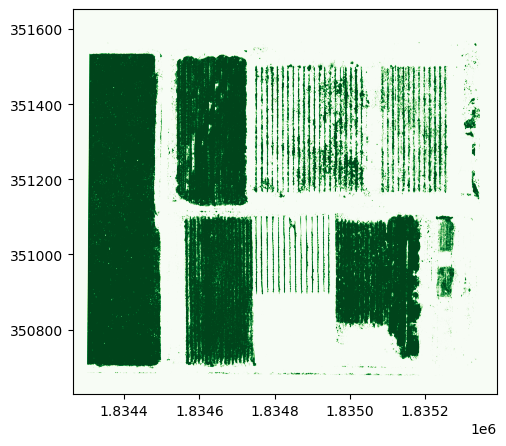

<AxesSubplot: >

In [39]:
nir = img[3,:,:]
red = img[2,:,:]

ndvi = calculate_vegetation_index(nir, red)

vegetation = ((ndvi > 0.5) & (ndvi < 1.0))

rasterio.plot.show(vegetation, transform=metadata['transform'], cmap='Greens')